In [1]:
# Notebook to analyse Bookkeeper General Batavia files for rises in opium trade
# DHBenelux 2024

# The code in this notebook was used to generate Figures 2 & 3 in the abstract "Smoke and Mirrors:
# Tracing the Influence of the Opium Trade in the Dutch East India Company through Letters and Cargo Logs"

# Author: marieke.van.erp@dh.huc.knaw.nl 

In [16]:
# Load necessary packages 
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# Load data 
# Data provided by the Globalise project: https://globalise.huygens.knaw.nl/ contact them for a copy
df_cargo  = pd.read_excel('bgb.xlsx', sheet_name='bgb_cargo')
df_product = pd.read_excel('bgb.xlsx', sheet_name='bgb_product')
df_voyage = pd.read_excel('bgb.xlsx', sheet_name='bgb_voyage')

In [4]:
# Some hacky code to merge the different dataframes 
df_intermediate = df_cargo.merge(df_product,left_on='carProductId', right_on='id', how='left')
df = df_intermediate.merge(df_voyage, left_on='carVoyageId', right_on='voyId',how='left')


In [5]:
# and clean it up so only the relevant columns are present 
pruned_dataframe = df[['naam', 'carQuantity','carValue', 'carValueGuldens',
                       'carValueStuivers','carValuePenningen','voyBookingYear']].copy()

In [9]:
# Select the opium rows in the dataframe and group them by value 
opium_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'opium']
opium_value_per_year = opium_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
# Get number of ships that transport opium per year 
opium_counter = opium_rows.groupby('voyBookingYear').size().reset_index(name='counts')
opium_counter['naam']='opium'

In [10]:
# Do the same for pepper, cinnamon, mace and nutmet 
peper_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'peper']
peper_counter = peper_rows.groupby('voyBookingYear').size().reset_index(name='counts')
peper_counter['naam']='pepper'
kaneel_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'kaneel']
kaneel_counter = kaneel_rows.groupby('voyBookingYear').size().reset_index(name='counts')
kaneel_counter['naam']='cinnamon'
foelie_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'foelie']
foelie_counter = foelie_rows.groupby('voyBookingYear').size().reset_index(name='counts')
foelie_counter['naam']='mace'
nootmuskaat_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'nootmuskaat']
nootmuskaat_counter = nootmuskaat_rows.groupby('voyBookingYear').size().reset_index(name='counts')
nootmuskaat_counter['naam']='nutmeg'

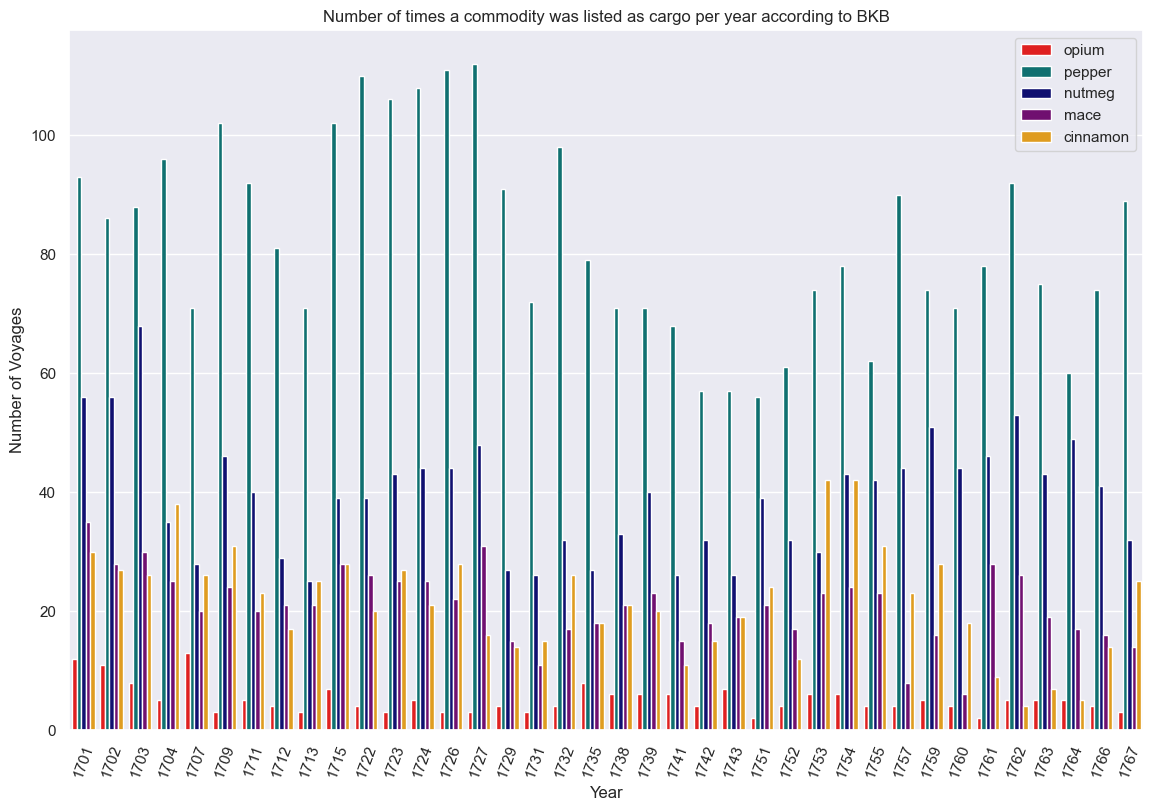

In [14]:
# Bar plot for the number of times opium, pepper, nutmeg, mace, and cinnamon were shipped by the VOC per year 
dss = pd.concat([opium_counter, peper_counter, nootmuskaat_counter, foelie_counter, kaneel_counter])
dss.voyBookingYear = dss.voyBookingYear.astype(int)
dss = dss[(dss['voyBookingYear'] < 1768)]

sns.set(rc={'figure.figsize':(11.7,8.27)})
commodities_palette = ['red', 'teal', 'navy', 'purple', 'orange']
ax = sns.barplot(x='voyBookingYear', y='counts', palette=commodities_palette, hue='naam', data=dss)
ax.set(xlabel='Year', ylabel='Number of Voyages', title='Number of times a commodity was listed as cargo per year according to BKB')
plt.legend(title="")
plt.xticks(rotation=70)
plt.tight_layout()

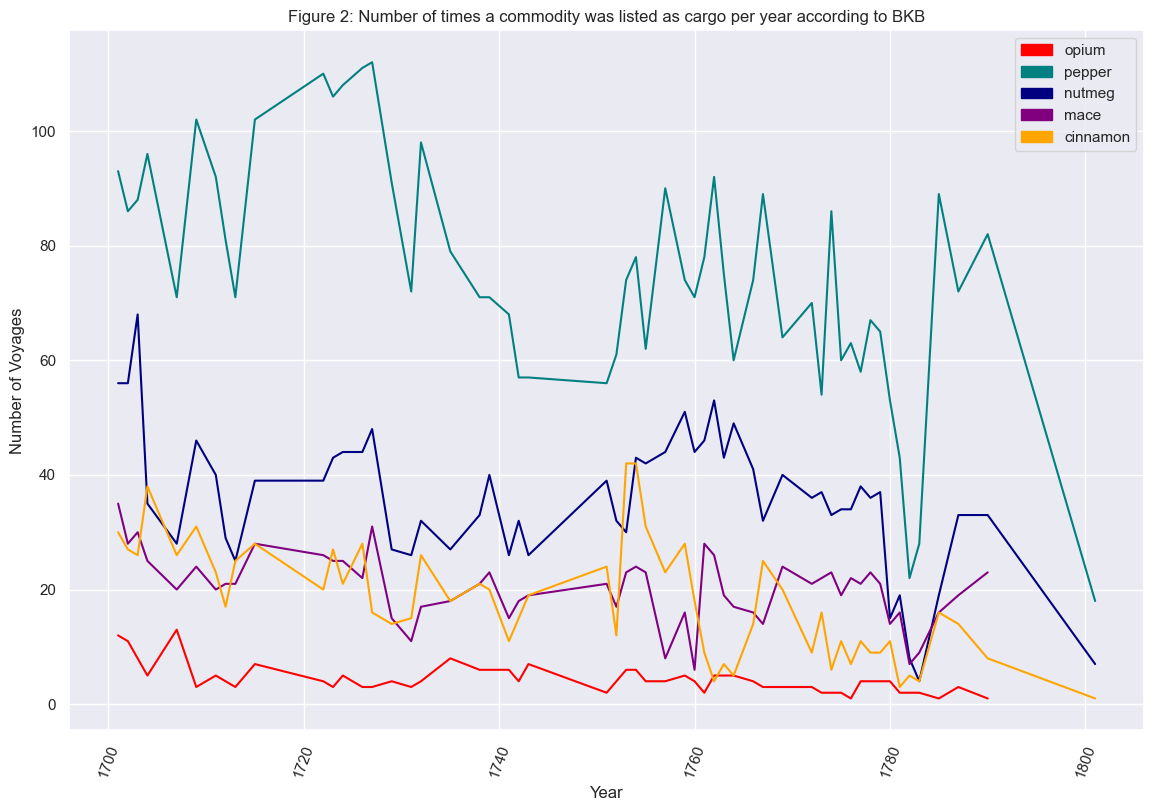

In [17]:
# Number of voyages as line plot - this looks a bit more informative, so this is the actual Figure 2 
# that ended up in the abstract 
ax = sns.lineplot(x='voyBookingYear', y='counts', data=opium_counter, color='red')
sns.lineplot(x='voyBookingYear', y='counts', data=peper_counter, color='teal')
sns.lineplot(x='voyBookingYear', y='counts', data=nootmuskaat_counter, color='navy')
sns.lineplot(x='voyBookingYear', y='counts', data=foelie_counter, color='purple')
sns.lineplot(x='voyBookingYear', y='counts', data=kaneel_counter, color='orange')
ax.set(xlabel='Year', ylabel='Number of Voyages', title='Figure 2: Number of times a commodity was listed as cargo per year according to BKB')
opium_patch = mpatches.Patch(color='red', label='opium')
pepper_patch = mpatches.Patch(color='teal', label='pepper')
nutmeg_patch = mpatches.Patch(color='navy', label='nutmeg')
mace_patch = mpatches.Patch(color='purple', label='mace')
cinnamon_patch = mpatches.Patch(color='orange', label='cinnamon')
ax.legend(handles=[opium_patch, pepper_patch, nutmeg_patch, mace_patch, cinnamon_patch])
plt.xticks(rotation=70)
plt.tight_layout()

In [19]:
# the number of times something is traded is one thing, but how about its value? 
# First mash up some data to get the average value of a commodity per year 
#peper_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'peper']
peper_value_per_year = peper_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
#foelie_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'foelie']
foelie_value_per_year = foelie_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
#nootmuskaat_rows = pruned_dataframe.loc[pruned_dataframe['naam'] == 'nootmuskaat']
nootmuskaat_value_per_year = nootmuskaat_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
kaneel_value_per_year = kaneel_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
opium_value_per_year = opium_rows.groupby('voyBookingYear', as_index=False)['carValueGuldens'].mean()
kaneel_value_per_year['naam']='cinnamon'
opium_value_per_year['naam']='opium'
peper_value_per_year['naam']='pepper'
foelie_value_per_year['naam']='mace'
nootmuskaat_value_per_year['naam']='nutmeg'

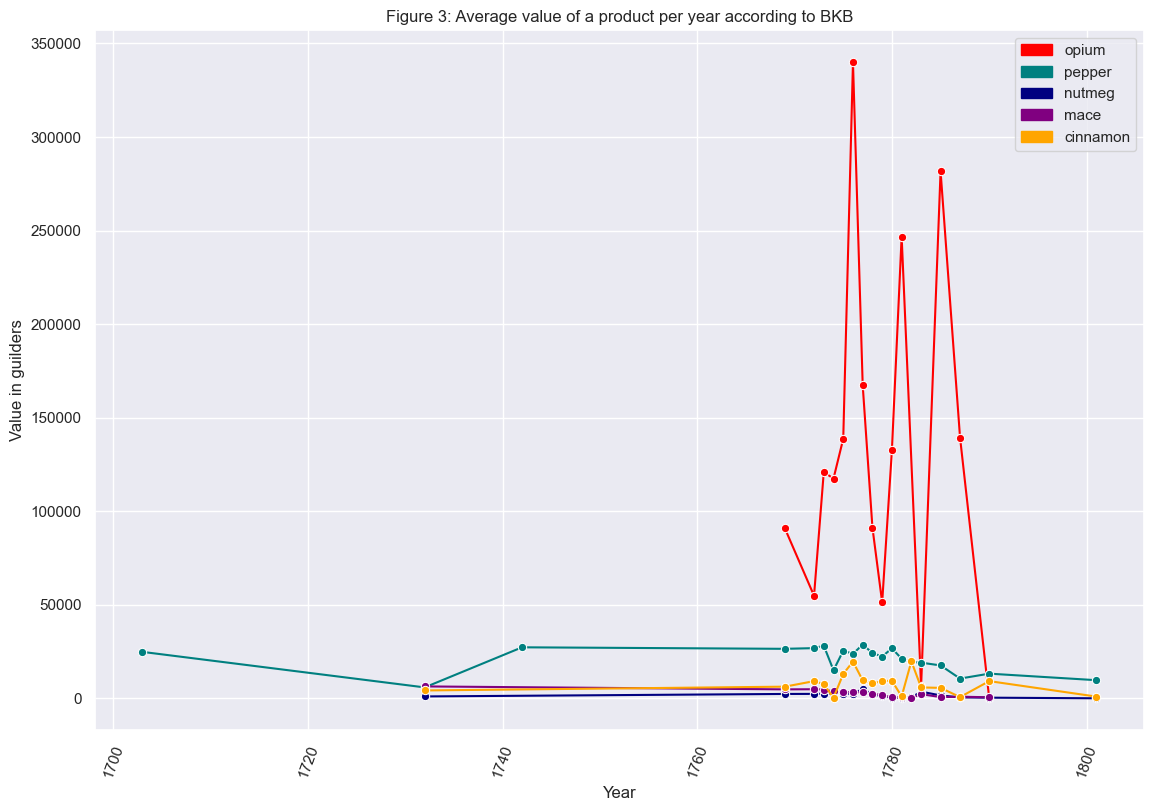

In [20]:
# Plot the values per year - this is Figure 3 in the abstract 
ax = sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=opium_value_per_year, color='red', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=peper_value_per_year, color='teal', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=nootmuskaat_value_per_year, color='navy', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=foelie_value_per_year, color='purple', marker="o")
sns.lineplot(x='voyBookingYear', y='carValueGuldens', data=kaneel_value_per_year, color='orange', marker="o")
ax.set(xlabel='Year', ylabel='Value in guilders', title='Figure 3: Average value of a product per year according to BKB')
opium_patch = mpatches.Patch(color='red', label='opium')
pepper_patch = mpatches.Patch(color='teal', label='pepper')
nutmeg_patch = mpatches.Patch(color='navy', label='nutmeg')
mace_patch = mpatches.Patch(color='purple', label='mace')
cinnamon_patch = mpatches.Patch(color='orange', label='cinnamon')
ax.legend(handles=[opium_patch, pepper_patch, nutmeg_patch, mace_patch, cinnamon_patch])
plt.title('Figure 3: Average value of a product per year according to BKB')
plt.xticks(rotation=70)
plt.tight_layout()

In [ ]:
# The end (for now)